# DETECTR 010 Analysis
This notebook is for formatting, analyzing and plotting the DETECTR_010 data. 

## Objective
Test the difference between adding target dsDNA/gDNA before or at the same time as adding reporter. Also, to test different gRNAs with gDNA backgrounds.

## Formatting to CSV file
Take txt file from plate reader and turn into tidy data format

In [206]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

import holoviews as hv
import bokeh
import hvplot.pandas

In [207]:
#read in CSV file
DETECTR_raw = pd.read_csv("../raw_txt_files/DETECTR_010.txt", encoding='utf-16', sep="\t", delimiter="\t",index_col=None, skiprows= 3,header = None)

In [208]:
#drop empty columns - we only had samples in the 2 and 3 columns of the plate
DETECTR_raw = DETECTR_raw.drop(list(range(4,len(DETECTR_raw.columns))), axis=1)

In [209]:
DETECTR_raw.head(10)

,0,1,2,3
0,00:00:00,36.9,10.755,3.145
1,NaN,NaN,4.045,3.759
2,NaN,NaN,8.178,3.043
3,NaN,NaN,3.318,3.245
4,NaN,NaN,8.866,3.102
5,NaN,NaN,3.158,3.690
6,NaN,NaN,12.527,2.764
7,NaN,NaN,2.794,3.139
8,NaN,NaN,8.118,2.955
9,NaN,NaN,4.190,3.419


In [210]:
#identify the end of the file
end_indices = DETECTR_raw[0][DETECTR_raw[0]=='~End'].index.tolist()
end_indices[0]

1936

In [211]:
#remove unnecessary colums at the beginning of the file and unnecessary rows at the end of the file
#we want to keep the file with the time information
DETECTR_raw = DETECTR_raw.drop(list(range(end_indices[0], len(DETECTR_raw))), axis = 0)

In [212]:
DETECTR_raw = DETECTR_raw.drop([1], axis = 1)

In [213]:
#how many plate reads did we have?
len(DETECTR_raw)/16

121.0

In [214]:
#set a variable to identify the number of plate reads
num_plate_reads = int(len(DETECTR_raw)/16)

In [215]:
DETECTR_raw.head(16)

,0,2,3
0,00:00:00,10.755,3.145
1,NaN,4.045,3.759
2,NaN,8.178,3.043
3,NaN,3.318,3.245
4,NaN,8.866,3.102
5,NaN,3.158,3.690
6,NaN,12.527,2.764
7,NaN,2.794,3.139
8,NaN,8.118,2.955
9,NaN,4.190,3.419


In [216]:
#create a dictionary mapping the row number to a letter for 384 and 96
well_dict_384 = {1:"A",2:"B",3:"C",4:"D",5:"E",6:"F",7:"G",8:"H",9:"I",10:"J",11:"K",12:"L",13:"M",14:"N",15:"O",16:"P"}
well_dict_96 = {1:"A",2:"A",3:"B",4:"B",5:"C",6:"C",7:"D",8:"D",9:"E",10:"E",11:"F",12:"F",13:"G",14:"G",15:"H",16:"H"}

In [217]:
#initialize the cleaned data frame
DETECTR_cleaned = pd.DataFrame(columns = ['time','row_384','column_384', 'row_96','column_96','rfu_value'])

In [218]:
#iterate over each plate to create a dataframe with the correct time, the 384 and 96 position and the RFU_value
for i in list(range(0,num_plate_reads)):
    time = DETECTR_raw.iloc[i*16,0]
    for j in list(range(2, 4)):
        for k in list(range(i*16, i*16+16)):
            rfu_value = DETECTR_raw.loc[k,j]
            row_384 = well_dict_384[k%16+1]
            column_384 = j - 1
            row_96 = well_dict_96[k%16+1]
            column_96 = (j) // 2 
            DETECTR_cleaned.loc[len(DETECTR_cleaned)] = [time, row_384, column_384,row_96,column_96,rfu_value]
    

In [219]:
DETECTR_raw.tail(10)

,0,2,3
1926,NaN,11.862,2.760
1927,NaN,2.815,3.596
1928,NaN,8.509,2.836
1929,NaN,22.151,14.039
1930,NaN,3.084,2.751
1931,NaN,11.331,7.629
1932,NaN,7.577,2.684
1933,NaN,3.618,3.876
1934,NaN,11.691,2.485
1935,NaN,3.513,3.682


In [220]:
DETECTR_cleaned.tail(10)

,time,row_384,column_384,row_96,column_96,rfu_value
3862,04:00:00,G,2,D,1,2.760
3863,04:00:00,H,2,D,1,3.596
3864,04:00:00,I,2,E,1,2.836
3865,04:00:00,J,2,E,1,14.039
3866,04:00:00,K,2,F,1,2.751
3867,04:00:00,L,2,F,1,7.629
3868,04:00:00,M,2,G,1,2.684
3869,04:00:00,N,2,G,1,3.876
3870,04:00:00,O,2,H,1,2.485
3871,04:00:00,P,2,H,1,3.682


In [221]:
#how many rows in our data frame now? should be 384*number of plates
len(DETECTR_cleaned)

3872

In [222]:
#write this file to a CSV
DETECTR_cleaned.to_csv("DETECTR_010_tidy.csv")

In [223]:
#confirm the shape of our data frame
DETECTR_cleaned.columns

Index(['time', 'row_384', 'column_384', 'row_96', 'column_96', 'rfu_value'], dtype='object')

In [224]:
DETECTR_cleaned.head(10)

,time,row_384,column_384,row_96,column_96,rfu_value
0,00:00:00,A,1,A,1,10.755
1,00:00:00,B,1,A,1,4.045
2,00:00:00,C,1,B,1,8.178
3,00:00:00,D,1,B,1,3.318
4,00:00:00,E,1,C,1,8.866
5,00:00:00,F,1,C,1,3.158
6,00:00:00,G,1,D,1,12.527
7,00:00:00,H,1,D,1,2.794
8,00:00:00,I,1,E,1,8.118
9,00:00:00,J,1,E,1,4.190


## Filter the data frame
Select only wells we are interested in

In [225]:
#only select rows with the 2 hour (final) time point
DETECTR_4hr = DETECTR_cleaned.loc[(DETECTR_cleaned["time"]=="04:00:00") ]

In [226]:
#only select the rows in which we had sample
DETECTR_4hr = DETECTR_4hr.loc[(DETECTR_4hr["row_384"].isin(['B','D','F','H','J','L','N','P']))]

In [227]:
DETECTR_4hr

,time,row_384,column_384,row_96,column_96,rfu_value
3841,04:00:00,B,1,A,1,11.416
3843,04:00:00,D,1,B,1,7.298
3845,04:00:00,F,1,C,1,3.875
3847,04:00:00,H,1,D,1,2.815
3849,04:00:00,J,1,E,1,22.151
3851,04:00:00,L,1,F,1,11.331
3853,04:00:00,N,1,G,1,3.618
3855,04:00:00,P,1,H,1,3.513
3857,04:00:00,B,2,A,1,9.473
3859,04:00:00,D,2,B,1,6.800


In [228]:
#define the experimental time which target DNA and gDNA was added
DETECTR_4hr['targetDNA_added'] = pd.Series(["with_gRNA","with_reporter","with_gRNA","with_reporter","with_gRNA","with_reporter","with_gRNA","with_reporter","with_gRNA","with_reporter","with_gRNA","with_reporter","with_gRNA","with_reporter","with_gRNA","with_reporter",], index = DETECTR_4hr.index)

In [229]:
#define the gRNA + target DNA used for this set
DETECTR_4hr['gRNA'] = pd.Series(["12E","12E","12E","12E","12E","12E","12E","12E","12F","12F","12F","12F","12F","12F","12F","12F"], index = DETECTR_4hr.index)

In [237]:
#define whether gDNA was added
DETECTR_4hr['gDNA'] = pd.Series(["target_DNA","target_DNA","gDNA","gDNA","target_DNA+gDNA","target_DNA+gDNA","H20","H20","target_DNA","target_DNA","gDNA","gDNA","target_DNA+gDNA","target_DNA+gDNA","H20","H20"], index = DETECTR_4hr.index)

In [238]:
DETECTR_4hr['well'] = (DETECTR_4hr['row_384'].map(str) + DETECTR_4hr['column_384'].map(str)).map(str)

## Plot the data
Create plots for each experiment set

In [239]:
DETECTR_4hr.columns

Index(['time', 'row_384', 'column_384', 'row_96', 'column_96', 'rfu_value',
       'targetDNA_added', 'gRNA', 'well', 'rfu_value_bkgrnd_sub', 'gDNA'],
      dtype='object')

In [240]:
DETECTR_4hr['rfu_value'] = DETECTR_4hr['rfu_value'].map(float)

In [241]:
background = statistics.mean(DETECTR_4hr.loc[(DETECTR_4hr["column_384"].isin([1,2])) & (DETECTR_4hr["row_384"].isin(['N','P']) )]['rfu_value'])
background

3.67225

In [242]:
DETECTR_4hr['rfu_value_bkgrnd_sub'] = DETECTR_4hr['rfu_value'] - background

In [243]:
DETECTR_4hr['sample'] = (DETECTR_4hr['gRNA'].map(str) + "_"+DETECTR_4hr['gDNA'].map(str)).map(str)

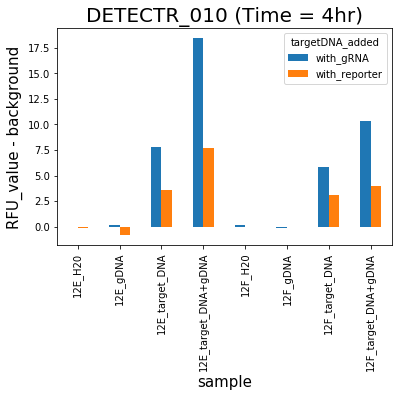

In [244]:

DETECTR_4hr.pivot('sample', 'targetDNA_added','rfu_value_bkgrnd_sub').plot(kind = 'bar',)
plt.title ('DETECTR_010 (Time = 4hr)')
plt.ylabel('RFU_value - background')
plt.rc('font', size=10)
plt.rc('axes', labelsize=15)

plt.savefig("DETECTR_010.pdf", bbox_inches='tight')



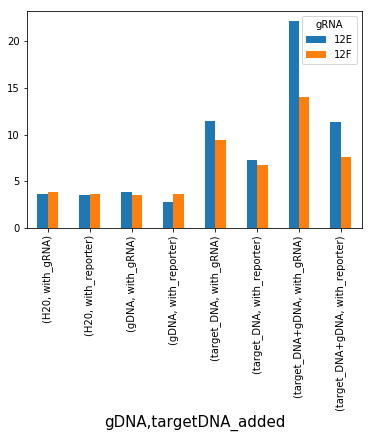

In [245]:
pd.crosstab([DETECTR_4hr['gDNA'],DETECTR_4hr['targetDNA_added']], DETECTR_4hr['gRNA'], values = DETECTR_4hr['rfu_value'], aggfunc = sum).plot.bar()

In [270]:
DETECTR_4hr.hvplot(x = 'gDNA', y = 'rfu_value_bkgrnd_sub', kind = 'bar', by = 'targetDNA_added',groupby = 'gRNA', color = ['green', 'purple'],rot = 90, legend = True)

:DynamicMap   [gRNA]
   :Bars   [gDNA,targetDNA_added]   (rfu_value_bkgrnd_sub)

In [278]:
DETECTR_4hr.hvplot(x = 'well', y = 'rfu_value_bkgrnd_sub', kind = 'bar', hover_cols = ['gRNA','gDNA'], by = 'targetDNA_added', rot = 90, legend = True)

:Bars   [well,targetDNA_added]   (rfu_value_bkgrnd_sub,gRNA,gDNA)

## Conclusions
Reporter has a huge effect on the final RFU. I increased our final concentration to 125nM. 

gRNA also has an effect on final RFU but hard to evaluate with only 3X guides. Will repeat with higher gRNA concentrations.

Target DNA is a limiting factor - we need a LOT of input DNA (1.6ng)

Wondering if template from transcription is interfering with reaction to cleave reporter as the template is also ssDNA - try DNAse treating to see. Can also order dsDNA transcription template